# Classification of IRIS Dataset

The aim of this project is to serve as the start of a series of machine learning projects that will develop my skills and capacity to build and implement machine learning pipelines for different tasks. For this task, the aimed benchmark is to reach 92% test accuracy and to really focus on exploratory data analysis, data visualization, and the machine learning pipeline. Regarding libraries, scikit-learn will be used initially, but then the models and gradient descent will be implemented manually.

**Main Objectives and Tasks:** ✔️
- <u>Import and clean the data</u>
- <u>Exploratory Data Analysis (EDA)</u>
- <u>Create a custom train/test split with stratify</u>
- <u>Preprocess the data</u>
- <u>Build the model. Try out Logistic Regression and KNN</u>
- <u>Regularize the model via LASSO or Ridge</u>
- <u>Hyperparameter Tuning via GridSearchCV</u>
- <u>Evaluate and compare the models</u>
- <u>Use a confusion matrix to better understand the model</u>
- <u>Predict on new data</u>

**Extra:**
- <u>Feature Engineering for Logistic Regression</u>
- <u>Manually implement Logistic Regression</u>
- <u>Manually implement Gradient Descent for Logistic Regression</u>
- <u>Manually implement the cost and loss functions</u>

### Importing the Libraries and Dataset

In [983]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [985]:
# Import the IRIS Data
from sklearn.datasets import load_iris
iris = load_iris(as_frame=False)

### Exploratory Data Analysis (EDA)

In [988]:
# Take a look at IRIS Dataset
iris.feature_names, iris.target

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [990]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [992]:
targets = pd.DataFrame(data=iris.target, columns=["target"])
data = pd.concat([df, targets], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [994]:
data.shape

(150, 5)

In [996]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [998]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


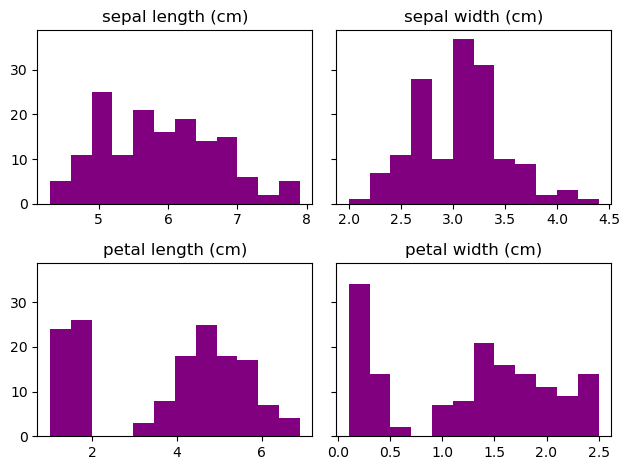

In [1000]:
# Plotting Histograms
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
axs = axs.ravel()
for i in range(len(axs)):
    axs[i].hist(df[features[i]], bins=12, color="purple")
    axs[i].set_title(features[i])

Looking at the histogram, the features Petal Length (cm) and Petal Width (cm) appear to be easily delineated into two different groups. A scatterplot will help to confirm this.

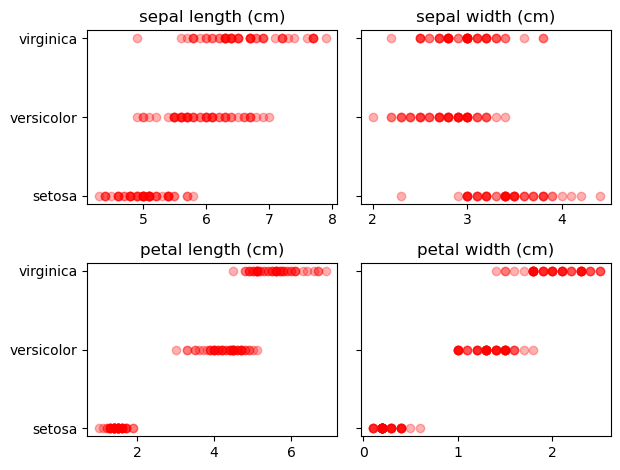

In [1003]:
# Plotting Scatterplots
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs = axs.ravel()
for i in range(len(axs)):
    axs[i].scatter(data[features[i]], data["target"], color="red", alpha=0.3)
    axs[i].set_title(features[i])
    axs[i].set_yticks([0, 1, 2])
    axs[i].set_yticklabels(["setosa", "versicolor", "virginica"])

The graph indicates that the iris species are quite clearly delineated by petal length and petal width, with little overlap. However, the sepal width and the sepal length do not appear to greatly distinguish the species from one another, although perhaps sepal length can distinguish virginica from setosa irises.

In [1006]:
# Check correlation of features in the data
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

Given the output of the correlation matrix, it can be concluded that the petal width and length are highly correlated with the labels. Moreover, while sepal length is still informative, it appears sepal width is less so than all the others.

### Training and Test Splits

In [1010]:
from sklearn.model_selection import train_test_split
# Split the data, use stratify to ensure equal proportion of classes in both train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data["target"], 
                                                    test_size=0.20, 
                                                    train_size=0.80, 
                                                    random_state=42, 
                                                    shuffle=True, 
                                                    stratify=data["target"])

In [1012]:
# Create validation set (get a 60/20/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.25, 
                                                    train_size=0.75, 
                                                    random_state=42, 
                                                    shuffle=True, 
                                                    stratify=y_train)

In [1014]:
# Check shapes of training, validation, and test data
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_val.shape

((90, 4), (90,), (30, 4), (30,), (30, 4), (30,))

### Feature Engineering

In [1082]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 3 Polynomial Logistic Regression
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# Fit to training, apply to validation and test sets
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
X_test_poly = poly_features.transform(X_test)
X_train_poly.shape

(90, 34)

### Preprocessing the Data

In [1020]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [1084]:
# Create Standard Scaler
standard_scaler = StandardScaler()

# Fitting and transforming the train_dataset, and then transforming the validation and test sets
X_train_poly_scaled = standard_scaler.fit_transform(X_train_poly)
X_val_poly_scaled = standard_scaler.transform(X_val_poly)
X_test_poly_scaled = standard_scaler.transform(X_test_poly)

### Building the Model

The models being evaluated are the Logistic Regression and kNN models. 

In [1087]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(penalty="l2", solver="saga", multi_class='multinomial', max_iter=5000)

In [1089]:
# Train the logistic regression model
logistic_regression.fit(X_train_poly_scaled, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', solver='saga')

In [1090]:
# kNN Model
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=5)

In [1093]:
# Train the kNN model
kNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Hyperparameter Tuning

Hyperparameter tuning will be performed on the validation dataset to determine the optimal combination for each model. 

For logistic regression, the **penalty**, **C**, and **tol (tolerance)** combinations will be tested. For the penalty, different regularizers will be checked, including **LASSO** (l1 norm), **Ridge** (l2 norm) and **ElasticNet**.

For kNN, **n_neighbors** will be tested.

In [1096]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [1098]:
# Create the parameter_grid for logistic regression and kNN
param_grid_lr = {"penalty": ["l1", "l2"], "C": [0.01, 1.0, 100], "tol": [0.0001, 0.001, 0.01]}
param_grid_kNN = {"n_neighbors": [1, 2, 5, 7, 10]}

In [1100]:
# Run GridSearchCV on logistic regression model
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring="accuracy", return_train_score=True)
grid_search_lr.fit(X_train_poly_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000,
                                          multi_class='multinomial',
                                          solver='saga'),
             param_grid={'C': [0.01, 1.0, 100], 'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='accuracy')

In [1101]:
# Now on kNN
grid_search_kNN = GridSearchCV(kNN, param_grid_kNN, cv=5, scoring="accuracy", return_train_score=True)
grid_search_kNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 7, 10]},
             return_train_score=True, scoring='accuracy')

In [1102]:
# Check best hyperparameter_combinations
grid_search_lr.best_params_, grid_search_kNN.best_params_

({'C': 1.0, 'penalty': 'l1', 'tol': 0.0001}, {'n_neighbors': 5})

In [1103]:
# Predict on Validation set
grid_search_lr.predict(X_val_poly_scaled), grid_search_kNN.predict(X_val)

(array([2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1,
        0, 2, 0, 2, 1, 1, 0, 1]),
 array([2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1,
        0, 2, 0, 2, 1, 1, 0, 1]))

In [1104]:
# Compute accuracy scores for validation set
cross_val_lr = cross_val_score(grid_search_lr, X_val_poly_scaled, y_val, cv=3, scoring="accuracy")
cross_val_kNN = cross_val_score(grid_search_kNN, X_val, y_val, cv=3, scoring="accuracy")
cross_val_lr, cross_val_kNN

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 87,

(array([1. , 1. , 0.8]), array([0.9, 1. , 0.8]))

Output example: (array([1. , 0.9, 1. ]), array([0.9, 1. , 0.8])). These are how the models perform on the validation set. However, to truly evaluate the models, they have to be ran on the test set.

### Evaluation

In [1107]:
# First, retrain the model on the best parameters acquired from the GridSearchCV
logistic_regression_best = LogisticRegression(penalty="l1", solver="liblinear", C=1.0, tol=0.0001)
kNN_best = KNeighborsClassifier(n_neighbors=5)

logistic_regression_best.fit(X_train_poly_scaled, y_train)
kNN_best.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [1108]:
# Evaluate on test set
logistic_regression_test_scores = logistic_regression_best.score(X_test_poly_scaled, y_test)
kNN_test_scores = kNN_best.score(X_test_scaled, y_test)

In [1109]:
logistic_regression_test_scores, kNN_test_scores

(0.9, 0.9666666666666667)

Using the accuracy metric, we can conclude that kNN with an accuracy of 93.33% outperforms logistic regression with an accuracy of 96.67%

### Other Metrics

Other metrics are useful to determine how well the model performs and generalizes to unseen data.

A confusion matrix, precision, recall, and f1 score will be used to determine the performance of the model.
Morever, this will be performed on the logistic regression model, for the sake of analysis given the small amounts of data.

In [1112]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(logistic_regression_best, X_train_poly_scaled, y_train, cv=3)

In [1113]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[30,  0,  0],
       [ 0, 30,  0],
       [ 0,  1, 29]])

In [1114]:
confusion_matrix(y_test, logistic_regression_best.predict(X_test_poly_scaled))

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  9]])

From the confusion matrices provided on the training and test set. It seems the logistic regression model has most trouble differentiating versicolor from virginica classes, and these contribute the most in terms of wrong predictions. This is likely because versicolor and virginica are less easy to separate and closer in terms of feature space, which can be seen by looking at the scatter plots made earlier.

In [1116]:
# Other metrics
from sklearn.metrics import f1_score, precision_score, recall_score

preds = logistic_regression_best.predict(X_test_poly_scaled)
recall_score(y_test, preds, average="macro")

0.9

In [1117]:
precision_score(y_test, preds, average="macro")

0.9023569023569024

In [1118]:
f1_score(y_test, preds, average="macro")

0.899749373433584

Can conclude from the scores, that the model is balanced in false negatives and false positives due to the similarity of recall and f1 score.

### Predictions

Make predictions on a datapoint that should be, by its feature space, a setosa iris.

In [1141]:
# Create a pipeline for transformations
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('poly_features', poly_features),
    ('std_scaler', standard_scaler)
])

X = np.array([4.0, 3.9, 1.0, 0.3]).reshape(1, -1)
X_scaled_poly = num_pipeline.transform(X)
preds = logistic_regression_best.predict(X_scaled_poly)
preds

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([0])

As expected, given the petal length and width of the new X value, the model predicted a setosa iris.

### Logistic Regression (Softmax) Implementation

This is a manual implementation of the multinomial logistic (softmax) regression function. This implementation will include fitting the model, regularization (l2), and gradient descent.

Note: **X**: N x D, **W**: D x K, and **b**: K x 1

In [2575]:
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)
ohe = OneHotEncoder(sparse_output=False)
t_train = ohe.fit_transform(y_train.to_numpy().reshape(-1, 1))

class MultinomialLogisticRegression():
    """
    This is a custom implementation of the Multinomial Logistic Regression model with l2 regularization. The softmax regression function is
    used instead of the OneVsRest approach used by an ordinary multi-class classification logistic regression model.

    Parameters:
    - self.K is the number of classes in the multi-class classification model.
    - self.W are the weights used by the model (D x K)
    - self.b is the bias term of the model (K x 1)
    - self.epochs is the number of training epochs the model runs for
    - self.alpha is the learning rate used in the gradient descent algorithm to optimize the weights and biases.
    - self.lamb is the regularization term and determines how powerful the regularization is.
    
    
    """
    def __init__(self, K, alpha=0.01, lamb=0.01):
        # Weights are randomly initialized and biases are set to 0.
        self.W = np.random.randn(X.shape[1], K)
        self.b = np.zeros([K,])
        self.K = K
        self.epochs = 1000
        self.alpha = alpha
        self.lamb = lamb
    
    def softmax(self, o):
        # Softmax function implementation, the keepdims is used for broadcasting purposes.
        z =  np.exp(o) / np.sum(np.exp(o), axis=1, keepdims=True)
        return z
        
    def fit(self, X, t):
        # to_numpy() used as the data is being passed directly from pandas dataframes
        X = X.to_numpy()
        N = X.shape[0]

        for i in range(self.epochs):
            # Compute the pre-softmax output
            o = X @ self.W + self.b

            # Apply the softmax function
            y = self.softmax(o)

            # Compute the loss and predictions
            loss = self.regularized_loss(y, t, N)
            preds = np.argmax(y, axis=1)

            # Gradient descent
            g = self.gradient_descent(X, y, t, N)

            if i % 50 == 0:
                print(loss)
                print("The loss at step {0} loss is {1:.4f}.".format(i, loss))

    
    def regularized_loss(self, y, t, N):
        # The Regularized cost function includes both the categorical cross-entropy term and l2 normalization
        categorical_cross_entropy = - np.sum((t * np.log(y))) / N
        regularization_loss = np.sum(self.lamb*(self.W**2))
        return categorical_cross_entropy + regularization_loss

    def gradient_descent(self, X, y, t, N): 
        # Gradients updates for the Weights and Bias parameters
        self.W = self.W - self.alpha * ((1/N)*(X.T @ (y-t)) + 2*self.lamb*self.W)
        self.b = self.b - self.alpha * (1/N)*np.sum(y-t, axis=0)

    def predict(self, X):
        o = X.to_numpy() @ self.W + self.b
        y = self.softmax(o)
        preds = np.argmax(y, axis=1)
        return preds

In [2577]:
X_train_scale = standard_scaler.fit_transform(X_train)
mlr = MultinomialLogisticRegression(K=3, alpha=0.01, lamb=0.01)
mlr.fit(X_train, t_train)

10.403333421394123
The loss at step 0 loss is 10.4033.
1.2808437546495297
The loss at step 50 loss is 1.2808.
0.9624981953758457
The loss at step 100 loss is 0.9625.
0.8065277123728194
The loss at step 150 loss is 0.8065.
0.7194520151593411
The loss at step 200 loss is 0.7195.
0.6639403069405196
The loss at step 250 loss is 0.6639.
0.6249129747970497
The loss at step 300 loss is 0.6249.
0.595515409076872
The loss at step 350 loss is 0.5955.
0.5722555266018542
The loss at step 400 loss is 0.5723.
0.5531802332125302
The loss at step 450 loss is 0.5532.
0.5371125640158286
The loss at step 500 loss is 0.5371.
0.5232993421062764
The loss at step 550 loss is 0.5233.
0.5112343198068753
The loss at step 600 loss is 0.5112.
0.5005630524586774
The loss at step 650 loss is 0.5006.
0.4910286984938778
The loss at step 700 loss is 0.4910.
0.48243960324950635
The loss at step 750 loss is 0.4824.
0.4746490944332421
The loss at step 800 loss is 0.4746.
0.46754243382817096
The loss at step 850 loss is 0

In [2579]:
preds = mlr.predict(X_test)

In [2581]:
accuracy = 100 * np.sum(y_test == preds) / len(y_test)
accuracy

93.33333333333333

The logistic regression model managed to attain a test accuracy of 93.33%, which is very good.